<a href="https://colab.research.google.com/github/ayyucedemirbas/machine_learning_algorithms/blob/master/2DConvolution_and_Pooling_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.measure
from numpy.lib.stride_tricks import as_strided

Resource: https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381

In [ ]:
new_img=np.array([[1.5 , -0.4 ,0.73254  ] , [0.3, -3.5, 9.7], [-0.7 , 2.3 , 4.14]])

In [ ]:
kernel=np.array([[0.2 ,0.2 ,0.2  ] , [0.2 , 0.2 , 0.2]])

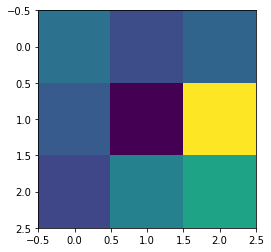

In [ ]:
i=0
img= new_img
plt.imshow(img)
plt.show()

In [ ]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [ ]:
def processImage(image): 
  image = cv2.imread(image) 
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
  return image

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving parrots_rescaled.jpg to parrots_rescaled.jpg


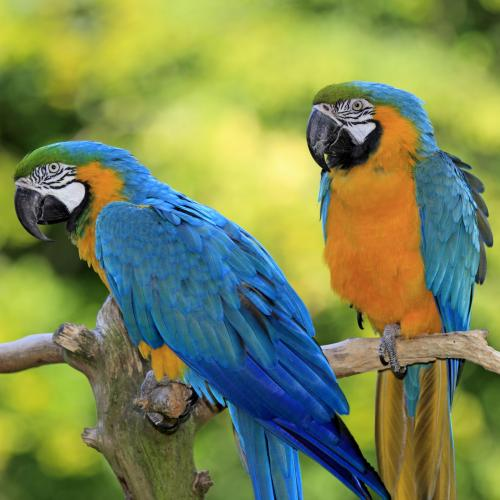

In [ ]:
from IPython.display import Image
Image('parrots_rescaled.jpg')

In [ ]:
image = processImage('parrots_rescaled.jpg')

    # Edge Detection Kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Convolve and Save Output
output = convolve2D(image, kernel, padding=2)
cv2.imwrite('2DConvolved.jpg', output)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 192. ... 129.   0.   0.]
 ...
 [  0.   0. 103. ... 137.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


True

In [ ]:
print(output)

[[-192. -384. -575. ...    0.    0.    0.]
 [-384.  960.  578. ...    0.    0.    0.]
 [-576.  576.    3. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]


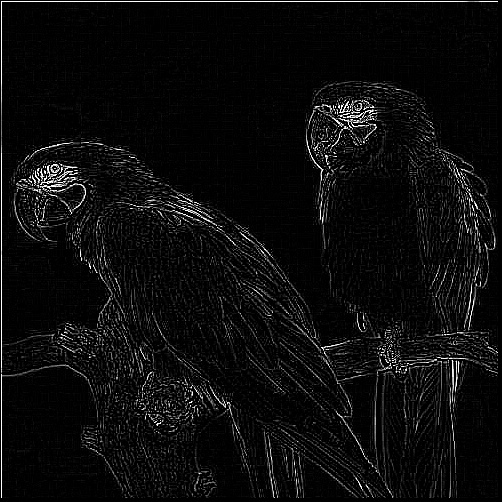

In [ ]:
Image('2DConvolved.jpg')

In [ ]:
kernel_new = np.array([[0.5, 0.234, -1.47], [-0.91, 8.1, -2.7342], [-1.3, -0.8, 1.2]])

# Convolve and Save Output
output_new = convolve2D(image, kernel_new, padding=2)
cv2.imwrite('2DConvolved_new.jpg', output_new)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 192. ... 129.   0.   0.]
 ...
 [  0.   0. 103. ... 137.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


True

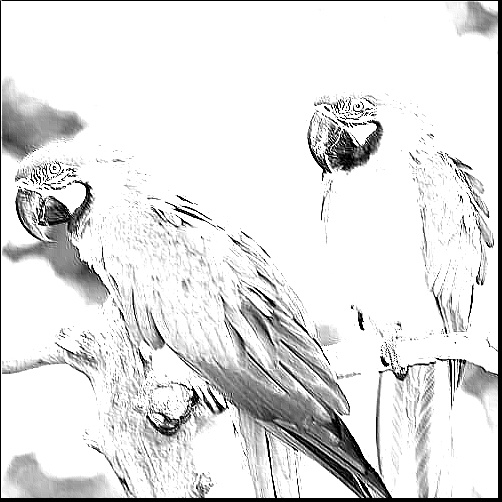

In [ ]:
Image('2DConvolved_new.jpg')

In [ ]:
from PIL import Image as im
img = im.fromarray(new_img, 'RGB')
img.save('my.png')

In [ ]:
kernel = np.array([[1.2, -5.2, 0.2], [0.2, -0.2, 0.2]])

# Convolve and Save Output
output = convolve2D(new_img, kernel, padding=2)
cv2.imwrite('2DConvolvedmine.jpg', output)

[[ 0.       0.       0.       0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.       0.       0.       0.     ]
 [ 0.       0.       1.5     -0.4      0.73254  0.       0.     ]
 [ 0.       0.       0.3     -3.5      9.7      0.       0.     ]
 [ 0.       0.      -0.7      2.3      4.14     0.       0.     ]
 [ 0.       0.       0.       0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.       0.       0.       0.     ]]


True

In [ ]:
Image("my.png")

In [49]:
a = np.array([
      [  20,  200,   -5,   23],
      [ -13,  134,  119,  100],
      [ 120,   32,   49,   25],
      [-120,   12,    9,   23]
])
skimage.measure.block_reduce(a, (2,2), np.max)


array([[200, 119],
       [120,  49]])

In [51]:
def pool2d(A, kernel_size, stride, padding, pool_mode='max'):
    '''
    2D Pooling

    Parameters:
        A: input 2D array
        kernel_size: int, the size of the window
        stride: int, the stride of the window
        padding: int, implicit zero paddings on both sides of the input
        pool_mode: string, 'max' or 'avg'
    '''
    # Padding
    A = np.pad(A, padding, mode='constant')

    # Window view of A
    output_shape = ((A.shape[0] - kernel_size)//stride + 1,
                    (A.shape[1] - kernel_size)//stride + 1)
    kernel_size = (kernel_size, kernel_size)
    A_w = as_strided(A, shape = output_shape + kernel_size, 
                        strides = (stride*A.strides[0],
                                   stride*A.strides[1]) + A.strides)
    A_w = A_w.reshape(-1, *kernel_size)

    # Return the result of pooling
    if pool_mode == 'max':
        return A_w.max(axis=(1,2)).reshape(output_shape)
    elif pool_mode == 'avg':
        return A_w.mean(axis=(1,2)).reshape(output_shape)

In [52]:
A = np.array([[1, 1, 2, 4],
                  [5, 6, 7, 8],
                  [3, 2, 1, 0],
                  [1, 2, 3, 4]])

pool2d(A, kernel_size=2, stride=2, padding=0, pool_mode='max')


array([[6, 8],
       [3, 4]])